# Computational Physics: Problem Set 1

## Exercise 1a)

### Numerical differentiation: Forward, central and extrapolation method.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema
plt.style.use('seaborn-poster')
%matplotlib inline

In [4]:
#functions

def g(x):
    return np.cos(x, dtype=np.float32) #float32 for single precision

def e(x):
    return np.exp(x, dtype=np.float32)

#forward
def forward(f,x,h):
    return(f(x+h)-f(x))/h

#central
def central(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

#extrapolation
def extra(f,x,h):
    return (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))/(12*h)

print("For cos(x):")
print(f"Exact: {-np.sin(0.1, dtype=np.float32)}, x=0.1 and {-np.sin(10, dtype=np.float32)}, x=10")
print(f"Forward difference method: {forward(g,0.1,0.1)}, x=0.1 and {forward(g,10,0.1)}, x=10")
print(f"Central difference method: {central(g,0.1,0.1)}, x=0.1 and {central(g,10,0.1)}, x=10")
print(f"Extrapolation method: {extra(g,0.1,0.1)}, x=0.1 and {extra(g,10,0.1)}, x=10")

print(" ")
print("For exp(x):")
print(f"Exact: {np.exp(0.1, dtype=np.float32)}, x=0.1 and {np.exp(10, dtype=np.float32)}, x=10")
print(f"Forward difference method: {forward(e,0.1,0.1)}, x=0.1 and {forward(e,10,0.1)}, x=10")
print(f"Central difference method: {central(e,0.1,0.1)}, x=0.1 and {central(e,10,0.1)}, x=10")
print(f"Extrapolation method: {extra(e,0.1,0.1)}, x=0.1 and {extra(e,10,0.1)}, x=10")

For cos(x):
Exact: -0.0998334214091301, x=0.1 and 0.5440211296081543, x=10
Forward difference method: -0.1493757963180542, x=0.1 and 0.5850356817245483, x=10
Central difference method: -0.0996670126914978, x=0.1 and 0.5431169271469116, x=10
Extrapolation method: -0.09983296195665994, x=0.1 and 0.5440222223599751, x=10
 
For exp(x):
Exact: 1.1051709651947021, x=0.1 and 22026.46484375, x=10
Forward difference method: 1.1623179912567139, x=0.1 and 23165.546875, x=10
Central difference method: 1.1070138216018677, x=0.1 and 22063.28125, x=10
Extrapolation method: 1.1051672200361886, x=0.1 and 22026.513671874996, x=10


## Exercise 1b)

### Numerical differentiation: Relative error vs. step size.

0.4962503960060943
0.0016668638145769796
4.602190966389834e-06
0.07539146897830212
0.0016620723204151127
2.008656946091837e-06
0.05170876530577684
0.001667485362177303
3.3887594150424278e-06
0.05171424644537156
0.0016714623300273551
2.2167935409851747e-06


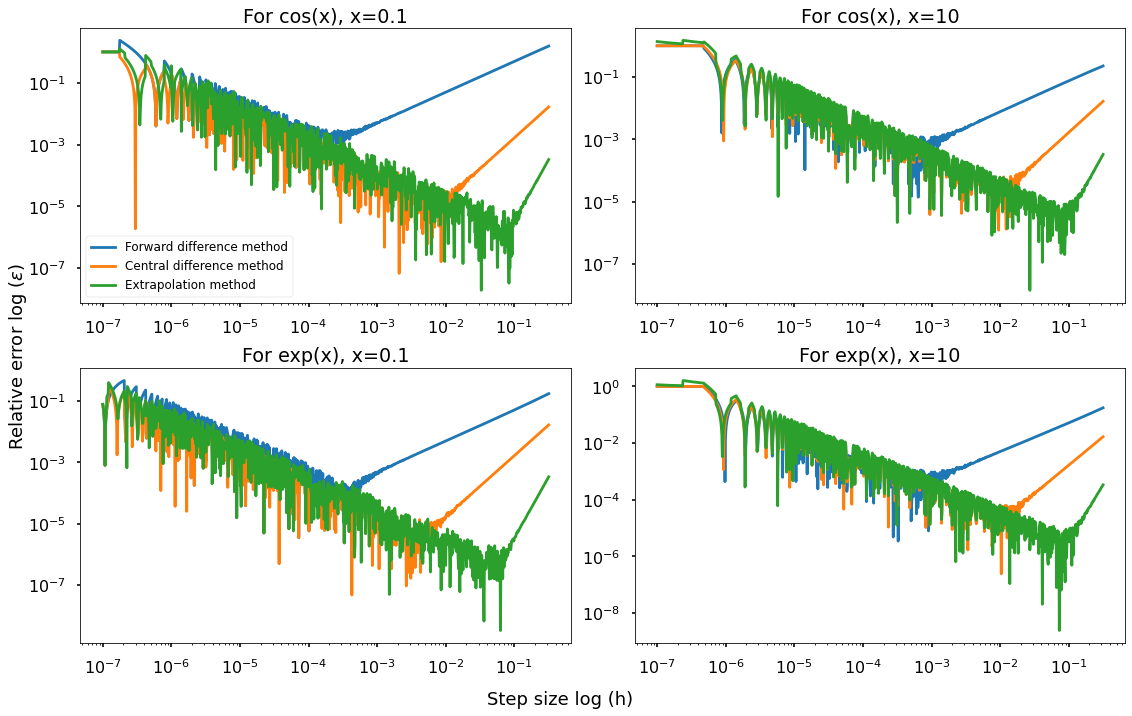

In [5]:
#Define relative error
def rel_error(f,func,j,x,h):
    return (np.abs(f(func,x,h)-j(x))/np.abs(j(x)))

#Define exact solution to the derivative of cos(x)
def t(x):
    return -np.sin(x, dtype=np.float32)

#Define h range
h = np.logspace(-7, -0.5, 1000) 


#Plot for all methods
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

#Check no. of digits
print(rel_error(forward,g,t,0.1,0.1))
print(rel_error(central,g,t,0.1,0.1))
print(rel_error(extra,g,t,0.1,0.1))

print(rel_error(forward,g,t,10,0.1))
print(rel_error(central,g,t,10,0.1))
print(rel_error(extra,g,t,10,0.1))

print(rel_error(forward,e,e,0.1,0.1))
print(rel_error(central,e,e,0.1,0.1))
print(rel_error(extra,e,e,0.1,0.1))

print(rel_error(forward,e,e,10,0.1))
print(rel_error(central,e,e,10,0.1))
print(rel_error(extra,e,e,10,0.1))

#cos, x=0.1
axs[0, 0].loglog(h, rel_error(forward,g,t,0.1,h), \
         label = 'Forward difference method')
axs[0, 0].loglog(h, rel_error(central,g,t,0.1,h), \
         label = 'Central difference method')
axs[0, 0].loglog(h, rel_error(extra,g,t,0.1,h), \
         label = 'Extrapolation method')
axs[0, 0].set_title("For cos(x), x=0.1")
axs[0, 0].legend(fontsize=12)

#cos, x=10
axs[0, 1].loglog(h, rel_error(forward,g,t,10,h), \
         label = 'Forward difference method')
axs[0, 1].loglog(h, rel_error(central,g,t,10,h), \
         label = 'Central difference method')
axs[0, 1].loglog(h, rel_error(extra,g,t,10,h), \
         label = 'Extrapolation method')
axs[0, 1].set_title("For cos(x), x=10")

#exp, x=0.1
axs[1, 0].loglog(h, rel_error(forward,e,e,0.1,h), \
         label = 'Forward difference method')
axs[1, 0].loglog(h, rel_error(central,e,e,0.1,h), \
         label = 'Central difference method')
axs[1, 0].loglog(h, rel_error(extra,e,e,0.1,h), \
         label = 'Extrapolation method')
axs[1, 0].set_title("For exp(x), x=0.1")

#exp, x=10
axs[1, 1].loglog(h, rel_error(forward,e,e,10,h), \
         label = 'Forward difference method')
axs[1, 1].loglog(h, rel_error(central,e,e,10,h), \
         label = 'Central difference method')
axs[1, 1].loglog(h, rel_error(extra,e,e,10,h), \
         label = 'Extrapolation method')
axs[1, 1].set_title("For exp(x), x=10")


fig.supxlabel("Step size log (h)", fontsize=18)
fig.supylabel("Relative error log ($\epsilon$)", fontsize=18) 

plt.tight_layout() 
plt.show()

## Exercise 2a)

### Numerical integration: Midpoint, trapezoid and Simpson's rule.

In [108]:
#Midpoint rule

def midpoint(N):
    N = np.int32(N)
    h = np.float32(1.0) / N
    x_mid = (np.arange(N, dtype=np.float32) + np.float32(0.5)) * h
    return np.float32(h) * np.sum(np.exp(-x_mid, dtype=np.float32))

print(f"Midpoint rule: {midpoint(1000)}")

#Trapezoid rule

def trap(N):
    N = np.int32(N)
    h = np.float32(1.0) / N
    x_trap = np.arange(N+1, dtype=np.float32)*h
    y = np.exp(-x_trap)
    return h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

print(f"Trapezoid rule: {trap(1000)}")

#Simpson's rule

def simp(N):
    if N % 2 == 1: #ensuring even no of intervals
        N += 1
    N = np.int32(N)
    h = np.float32(1.0) / N
    x_sim = np.arange(N+1, dtype=np.float32)*h
    y = np.exp(-x_sim)
    return (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]))

print(f"Simpson's rule: {simp(1000)}")

Midpoint rule: 0.6321204900741577
Trapezoid rule: 0.6321205852329731
Simpson's rule: 0.6321205512682596


## Exercise 2b)

### Numerical integration: Relative error vs step size.

0.6321205588285577


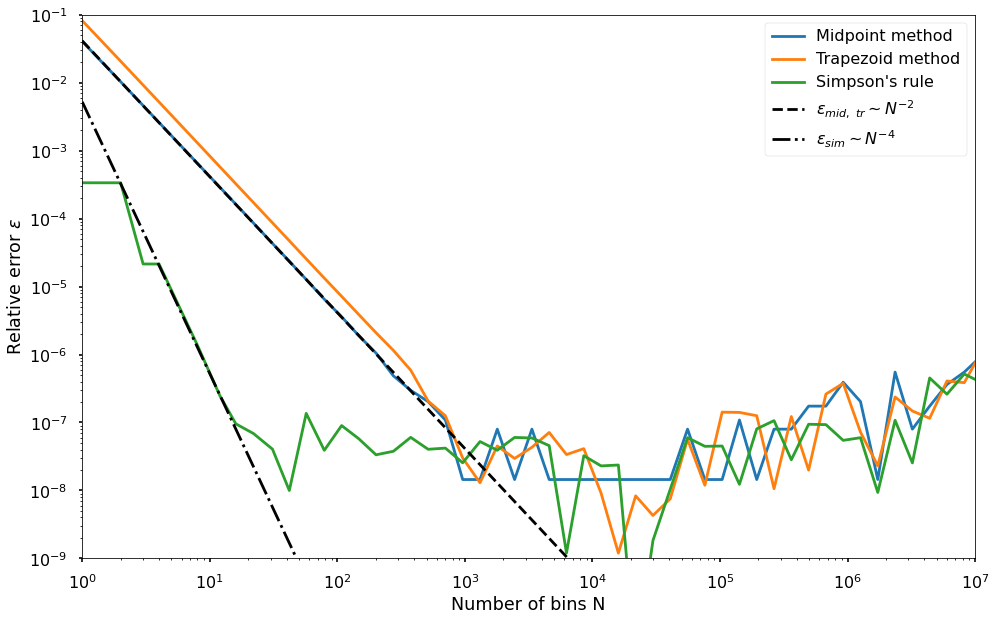

In [173]:
#Define exact solution to the integral of e(-x) from 0 to 1
I_exact=1-1/np.e

print (I_exact)

#Define relative error
def rel_error_mid(N):
    approx_mid=midpoint(N)
    return np.abs(np.float32(approx_mid - I_exact) / np.abs(I_exact))

def rel_error_trap(N):
    approx_trap=trap(N)
    return np.abs(np.float32(approx_trap - I_exact) / np.abs(I_exact))

def rel_error_simp(N):
    approx_simp=simp(N)
    return np.abs(np.float64(approx_simp - I_exact) / np.abs(I_exact))

N_vals = np.unique(np.logspace(0, 8, 60, dtype=int))
errors_mid = [rel_error_mid(N) for N in N_vals]
errors_trap = [rel_error_trap(N) for N in N_vals]
errors_simp = [rel_error_simp(N) for N in N_vals]

N_ref = N_vals[1]
err_ref = errors_mid[1] 
ref_slope2 = err_ref * (N_vals / N_ref)**(-2)
ref_slope4 = 10**(-1.5)*err_ref * (N_vals / N_ref)**(-4)



plt.figure(figsize=(16,10))
plt.loglog(N_vals, errors_mid, label="Midpoint method")
plt.loglog(N_vals, errors_trap, label="Trapezoid method")
plt.loglog(N_vals, errors_simp, label="Simpson's rule")

plt.loglog(N_vals, ref_slope2, 'k--', label=r"$\epsilon_{mid,\ tr}\sim N^{-2}$")
plt.loglog(N_vals, ref_slope4, 'k-.', label=r"$\epsilon_{sim}\sim N^{-4}$")

plt.xlim(1,10**(7))
plt.ylim(10**(-9),10**(-1))
plt.xlabel("Number of bins N")
plt.ylabel(r"Relative error $\epsilon$")
plt.legend()

## Exercise 3)

### Correlation function and power spectrum.

First 5 values from divergence test: [0. 0. 0. 0. 0.]
Local maxima at r = [105.58823529] [18.68791747] Mpc/h


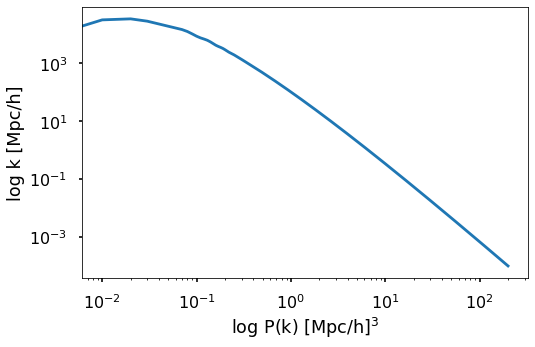

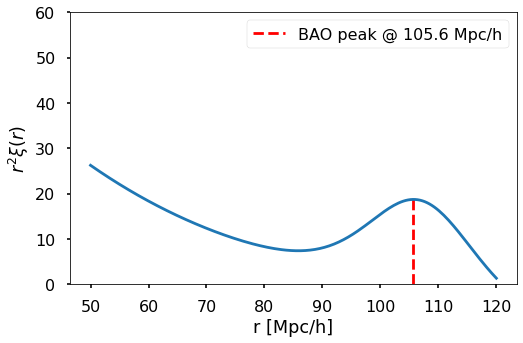

In [120]:
#Load power spectrum
data = np.loadtxt("/Users/sara/Downloads/power_spectrum.csv", delimiter=",", usecols=(0, 1))
k_col = data[:, 0]
P_col = data[:, 1]

#print(f"First 5 values of k, P(k): {k_col[:5], P_col[:5]}")

#Interpolate Power spectrum to define general form of P(k) that one can integrate over then
cs = CubicSpline(k_col, P_col, extrapolate=False)
    
def P(k):
    k = np.asarray(k)
    out = cs(k)
    out[np.isnan(out)] = 0.0
    return out

k_vals = np.linspace(0, 200, 20000)

#Plot power spectrum
plt.figure(figsize=(8,5))
plt.plot(k_vals,P(k_vals))
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0.1, 0.4)
#plt.ylim(1000, 10000)
plt.xlabel(r"log P(k) [Mpc/h]$^3$")
plt.ylabel(r"log k [Mpc/h]")

#Compute correlation function by integrating w midpoint rule over k e (0,10000)
def k_mid(i, h, kmin):
    return kmin + (i + 0.5)*h

def xi_midpoint(r, N=20000, kmin=0.0, kmax=4000.0):
    h = (kmax - kmin) / N
    sum_integrand = sum(
        (k_mid(i, h, kmin)**2) * P(k_mid(i, h, kmin)) * np.sin(k_mid(i, h, kmin)*r)/(k_mid(i, h, kmin)*r)
        for i in range(N)
    )
    return (h / (2*np.pi**2)) * sum_integrand


#Plot r^2*xi(r) vs. r
#Define r range and xi(r) values
r_vals = np.linspace(50, 120, 171) 
xi_vals = xi_midpoint(r_vals, kmin=0.0, kmax=4000, N=400000)

#Define r^2*xi(r)
r2xi=r_vals**2*xi_vals

#Divergence test with N1=20000 and N2=2*N1
xi_vals_2 = xi_midpoint(r_vals, kmin=0.0, kmax=8000, N=800000)
r2xi_2=r_vals**2*xi_vals_2

div=np.abs(xi_vals_2-xi_vals)/np.abs(xi_vals)
print(f"First 5 values from divergence test: {div[:5]}")

#Find BAO peak
local_max_indices = argrelextrema(r2xi, np.greater)[0]
x_local_max = r_vals[local_max_indices]
y_local_max = r2xi[local_max_indices]
 
print("Local maxima at r =",x_local_max, y_local_max, "Mpc/h")
#print(r2xi[:-5])


plt.figure(figsize=(8,5))
plt.plot(r_vals, r2xi)
#plt.plot(r_vals, r2xi_2)
#plt.plot(r_vals, div)
plt.vlines(x=105.6, ymin=0, ymax=18.7, color='red', linestyle='--', label=f"BAO peak @ 105.6 Mpc/h")
plt.ylim(0, 60)
plt.xlabel("r [Mpc/h]")
plt.ylabel(r"$r^2 \xi(r)$")
plt.legend()